In [182]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier



In [167]:
df= pd.read_csv('FlightDelays.csv')

In [168]:
df.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CRS_DEP_TIME   2201 non-null   int64 
 1   CARRIER        2201 non-null   object
 2   DEP_TIME       2201 non-null   int64 
 3   DEST           2201 non-null   object
 4   DISTANCE       2201 non-null   int64 
 5   FL_DATE        2201 non-null   object
 6   FL_NUM         2201 non-null   int64 
 7   ORIGIN         2201 non-null   object
 8   Weather        2201 non-null   int64 
 9   DAY_WEEK       2201 non-null   int64 
 10  DAY_OF_MONTH   2201 non-null   int64 
 11  TAIL_NUM       2201 non-null   object
 12  Flight Status  2201 non-null   object
dtypes: int64(7), object(6)
memory usage: 223.7+ KB


In [170]:
print(df.isnull().sum())

CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_DATE          0
FL_NUM           0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
TAIL_NUM         0
Flight Status    0
dtype: int64


In [171]:
# convert integer columns to float data type
df['DISTANCE'] = df['DISTANCE'].astype(float)
df['FL_NUM'] = df['FL_NUM'].astype(float)
df['Weather'] = df['Weather'].astype(float)

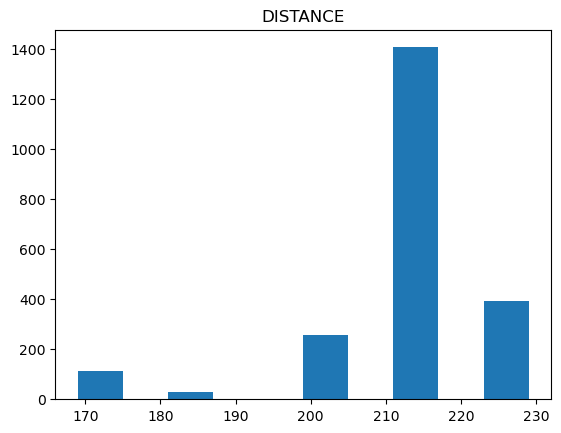

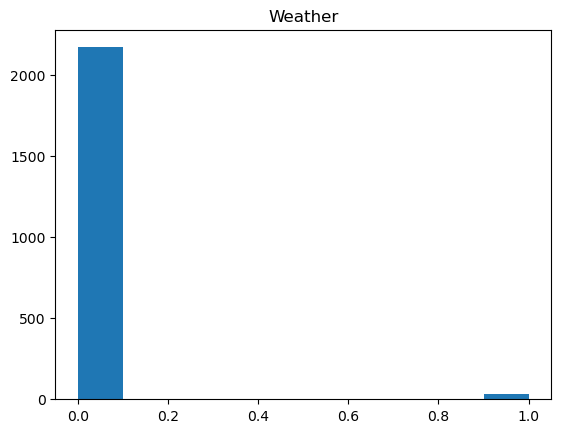

In [172]:
# plot histograms for numerical variables
num_vars = ['DISTANCE', 'Weather']
for var in num_vars:
    plt.hist(df[var])
    plt.title(var)
    plt.show()


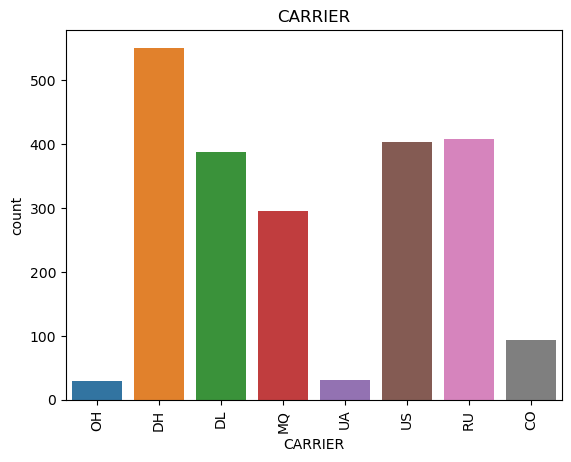

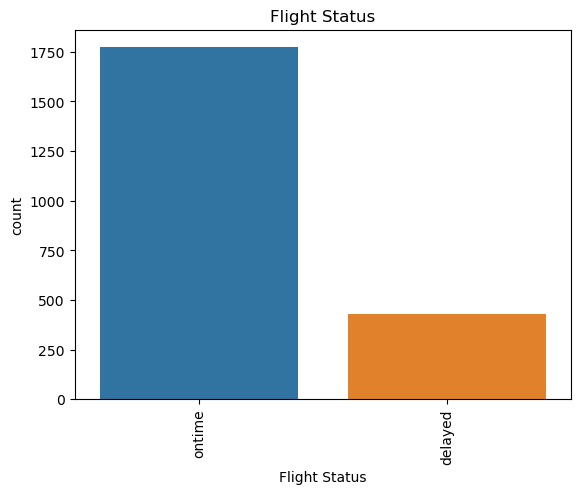

In [173]:
# plot count plots for categorical variables
cat_vars = ['CARRIER', 'Flight Status']
for var in cat_vars:
    sns.countplot(x=var, data=df)
    plt.xticks(rotation=90)
    plt.title(var)
    plt.show()

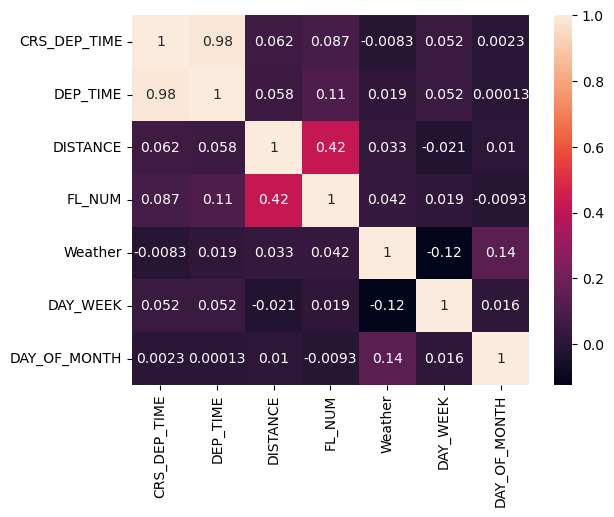

In [174]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()



In [175]:
df = df.drop(['FL_DATE', 'TAIL_NUM'], axis=1)

In [176]:
cat_cols = ['CARRIER', 'ORIGIN', 'DEST']
enc = OneHotEncoder(handle_unknown='ignore')
encoded = pd.DataFrame(enc.fit_transform(df[cat_cols]).toarray(), columns=enc.get_feature_names(cat_cols))
df = pd.concat([df.drop(cat_cols, axis=1), encoded], axis=1)

F:\DOCUMENTS\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [177]:
df['Flight Status'] = df['Flight Status'].map({'ontime': 0, 'delayed': 1})

In [178]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Flight Status', axis=1), df['Flight Status'], test_size=0.2, random_state=42)

In [179]:
# K-Nearest Neighbors
# Train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Evaluate the model
knn_score = knn.score(X_test, y_test)

F:\DOCUMENTS\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [180]:
# Naive Bayes
# Train the model
nb = GaussianNB()
nb.fit(X_train, y_train)
# Evaluate the model
nb_score = nb.score(X_test, y_test)

In [181]:
# Compare the two algorithms
if knn_score > nb_score:
    print('KNN performed better than Naive Bayes with a score of', knn_score)
else:
    print('Naive Bayes performed better than KNN with a score of', nb_score)

KNN performed better than Naive Bayes with a score of 0.8775510204081632


In [190]:
# Implementing Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Evaluate the model
rf_score = rf.score(X_test, y_test)

# Compare the three algorithms
scores = {'KNN': knn_score, 'Naive Bayes': nb_score}
for algo, score in scores.items():
    print(f"{algo} score: {score}")
best_model = max(scores, key=scores.get)
print(f"{best_model} performed the best with a score of {scores[best_model]}")

KNN score: 0.8775510204081632
Naive Bayes score: 0.7709750566893424
KNN performed the best with a score of 0.8775510204081632


In [191]:
# Comparing All the three Algorithms
scores = {'KNN': knn_score, 'Naive Bayes': nb_score, 'Random Forest': rf_score}

# Print the scores for each algorithm
for algo, score in scores.items():
    print(f"{algo} score: {score}")

# Select the best performing algorithm
best_model = max(scores, key=scores.get)
print(f"{best_model} performed the best with a score of {scores[best_model]}")

KNN score: 0.8775510204081632
Naive Bayes score: 0.7709750566893424
Random Forest score: 0.8752834467120182
KNN performed the best with a score of 0.8775510204081632
